<a href="https://colab.research.google.com/github/dhruvvaidh/Fraud_Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection





## Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Fraud.csv")

## Exploratory Data Analysis

In [ ]:
dataset.shape

(6362620, 11)

In [ ]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Data Dictionary**
* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
dataset.nameOrig.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [ ]:
dataset.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

Not Fraud vs Fraud

<Axes: xlabel='isFraud', ylabel='count'>

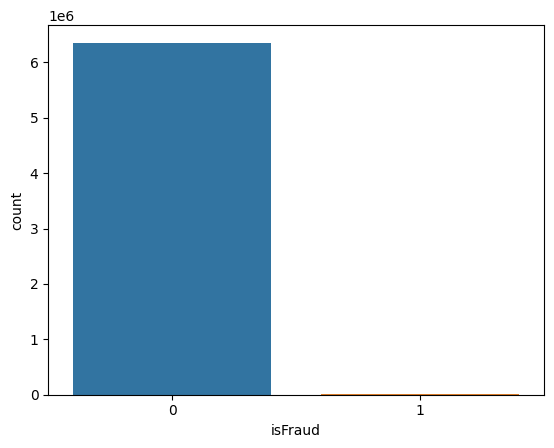

In [ ]:
sns.countplot(x = dataset.isFraud)

In [ ]:
dataset.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Visualising different types of payments

<Axes: xlabel='type', ylabel='count'>

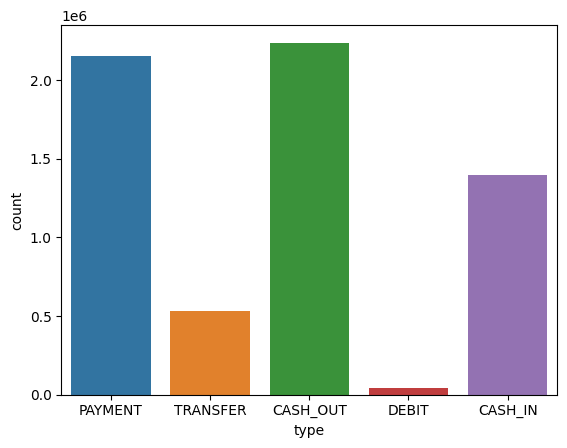

In [ ]:
sns.countplot(x=dataset.type)

In [ ]:
dataset.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Checking for Missing Values

In [ ]:
dataset.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
total_fradulent = len(dataset.loc[(dataset.isFraud == 1)])
print('\nTotal number of Fradulent Transaction are: ',total_fradulent)

Fraud_Transfer= (dataset.loc[(dataset.isFraud == 1)&(dataset.type == 'TRANSFER')]) 

print('\nNumber of fradulent via Transfers: ',len(Fraud_Transfer))

Fraud_Cash_out = (dataset.loc[(dataset.isFraud == 1)&(dataset.type == 'CASH_OUT')])
print('\nNumber of fradulent via Cash_Out: ', len(Fraud_Cash_out)) 

False_Fraud = (dataset.loc[(dataset.isFraud == 0)&(dataset.isFlaggedFraud == 1)])
print('\nNumber of flagged transactions which are not fraudulent: ', len(False_Fraud)) 


Total number of Fradulent Transaction are:  8213

Number of fradulent via Transfers:  4097

Number of fradulent via Cash_Out:  4116

Number of flagged transactions which are not fraudulent:  0


In [ ]:
FlaggedFraud_tran =  dataset.loc[dataset['isFlaggedFraud'] == 1].type.drop_duplicates().values
print('\nMethod of transaction used for isFlaggedFraud set: ',FlaggedFraud_tran)

FlaggedFraud_amt= len(dataset.loc[(dataset.amount > 200000)&(dataset.isFlaggedFraud == 1)&(dataset.type == 'TRANSFER')])
print('\nThe number of transaction having amount > 200,000 and transaction is in isFlaggedFraud set :',FlaggedFraud_amt) 

NotFlaggedFraud_amt= len(dataset.loc[(dataset.amount > 200000)&(dataset.isFlaggedFraud == 0)&(dataset.type == 'TRANSFER')])
print('\nThe number of TRANSFER having amount > 200,000 still being not set in isFlaggedFraud are :',NotFlaggedFraud_amt) 

Max_NotisFlaggedFraud = (dataset.loc[(dataset.type == 'TRANSFER') &(dataset.isFlaggedFraud == 0)]).amount.max()
print('\nInfact, the maximum amount paid in isFlaggedFraud set via "TRANSFER" is', Max_NotisFlaggedFraud) 


Method of transaction used for isFlaggedFraud set:  ['TRANSFER']

The number of transaction having amount > 200,000 and transaction is in isFlaggedFraud set : 16

The number of TRANSFER having amount > 200,000 still being not set in isFlaggedFraud are : 409094

Infact, the maximum amount paid in isFlaggedFraud set via "TRANSFER" is 92445516.64


The condition for isFlaggedFraud is not clearly justified. As directioned in the provided data, those transaction having amount greater than 200,000 is set for isFlaggedFraud. But despite this condition being satisfied for 16 transactions out of 6 million, there are 409094 transaction which are not set for isFlaggdFraud. Hence isFlaggedFraud condition can't be correlated with amount of transaction and those transactions which were fraud were labelled as fraud.

## Preprocessing the Data

In [ ]:
dataset=dataset.drop(["isFlaggedFraud","nameOrig","nameDest"],axis = "columns") 

Encoding the categorical variables

In [ ]:
"""
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
transformer = make_column_transformer((OneHotEncoder(), ['type']),remainder='passthrough')
transformed = transformer.fit_transform(dataset)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
"""
transformed_df = pd.get_dummies(dataset, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [ ]:
transformed_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


Dealing with Multicollinearity

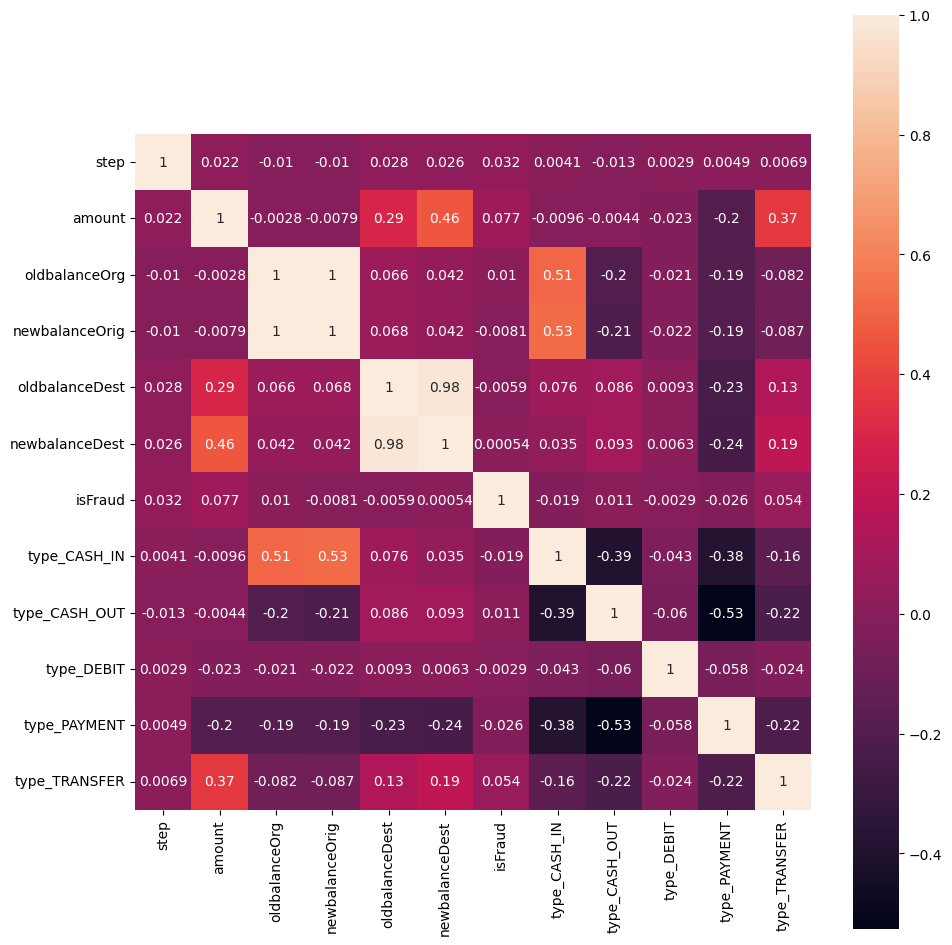

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(transformed_df.corr(method='pearson'), annot=True, cbar_kws={'shrink':1}, square=True, ax=ax)
plt.tight_layout()
ax.set_aspect('equal')
plt.show()
plt.clf()

In [ ]:
transformed_df = pd.get_dummies(dataset, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)

In [ ]:
features = transformed_df.drop("isFraud", axis = "columns")
label = transformed_df.isFraud

## Building and Training the model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.25, random_state = 20)

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

### Evaluating the model

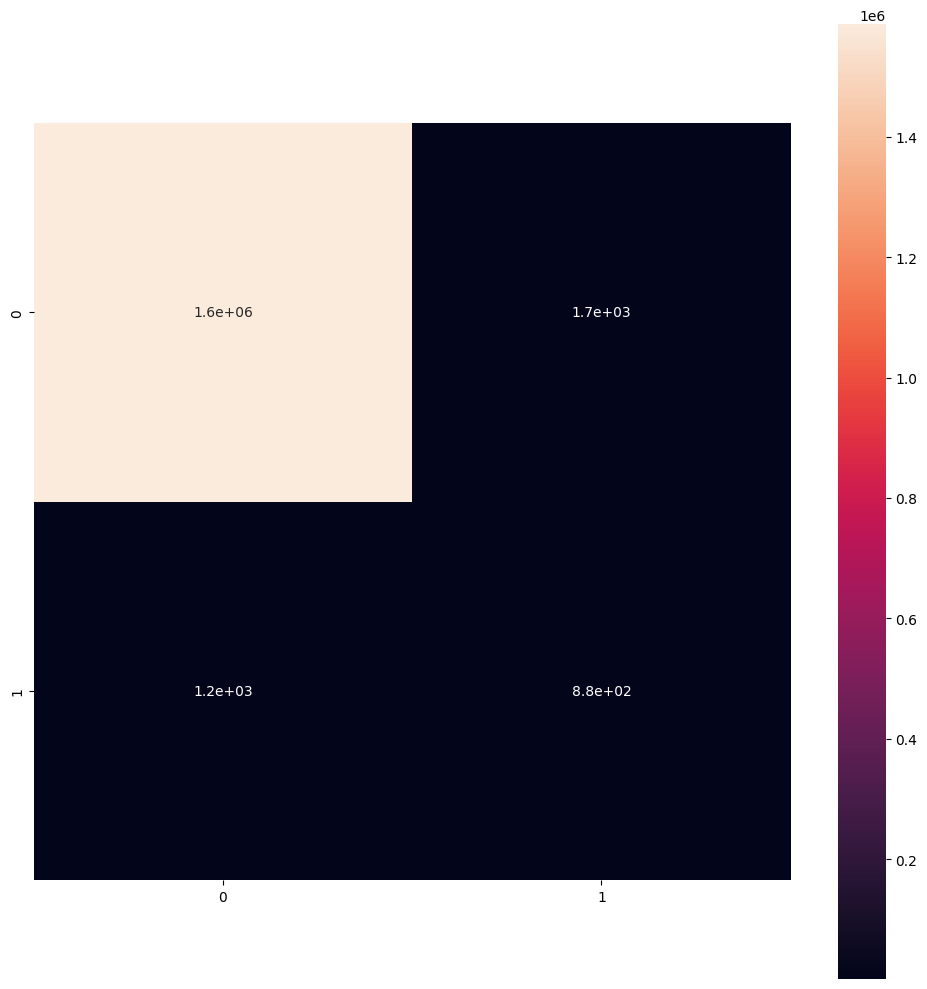

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True, cbar_kws={'shrink':1}, square=True, ax=ax)
plt.tight_layout()
ax.set_aspect('equal')
plt.show()
plt.clf()

In [ ]:
confusion_matrix(y_test , y_pred)

array([[1586950,    1662],
       [   1163,     880]])

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy Score for this model is = ", accuracy_score(y_true = y_test, y_pred = y_pred)*100)

Accuracy Score for this model is =  99.82240020620436


## 2. Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
y_pred1 = clf2.predict(X_test)

### Evaluating the model

In [ ]:
print("Accuracy Score for this model is = ", accuracy_score(y_true = y_test, y_pred = y_pred1)*100)

Accuracy Score for this model is =  99.96913221283056


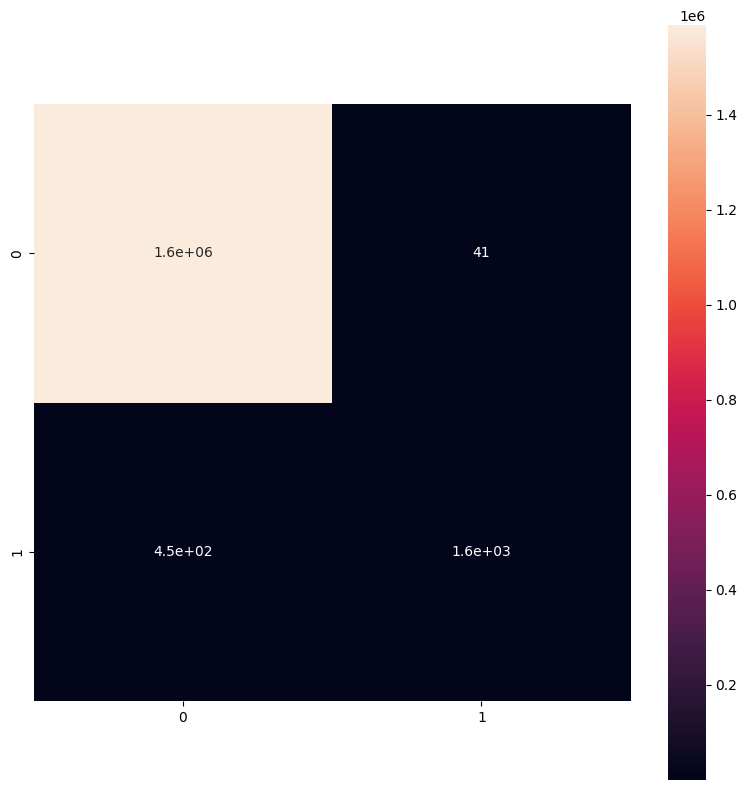

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test , y_pred1), annot=True, cbar_kws={'shrink':1}, square=True, ax=ax)
plt.tight_layout()
ax.set_aspect('equal')
plt.show()
plt.clf()

In [ ]:
confusion_matrix(y_test , y_pred1)

array([[1588571,      41],
       [    450,    1593]])

## 3. Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(hidden_layer_sizes=(150,), activation='relu', solver='adam', 
                     learning_rate='adaptive', batch_size = 300, learning_rate_init=0.001, shuffle=True, 
                     random_state=25, early_stopping=True, validation_fraction=0.1)
clf3.fit(X_train, y_train)
y_pred2 = clf3.predict(X_test)

### Evaluating the model

In [ ]:
print("Accuracy Score for this model is = ", accuracy_score(y_true = y_test, y_pred = y_pred2)*100)

Accuracy Score for this model is =  99.93361225407143


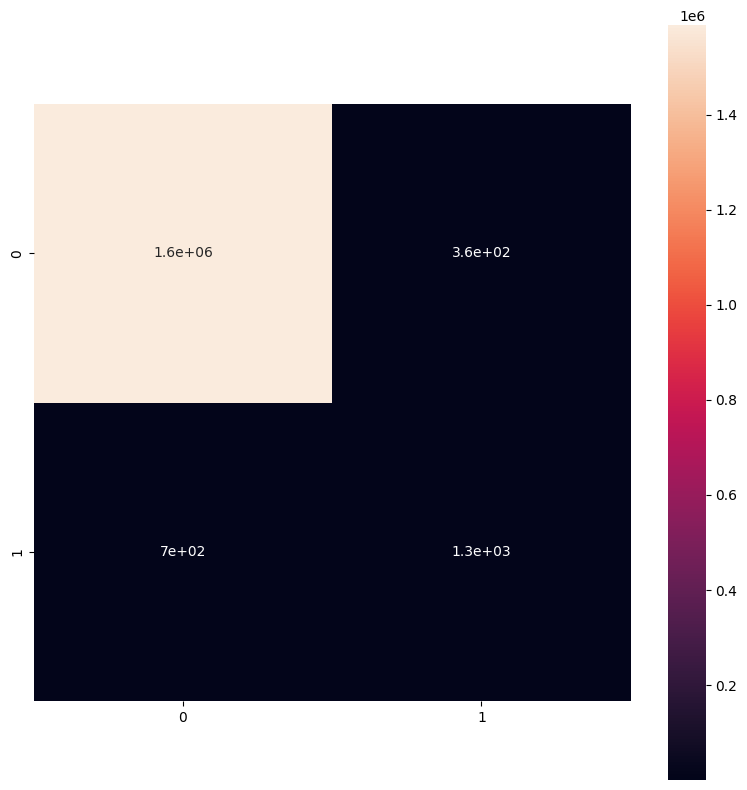

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test , y_pred2), annot=True, cbar_kws={'shrink':1}, square=True, ax=ax)
plt.tight_layout()
ax.set_aspect('equal')
plt.show()
plt.clf()

In [ ]:
confusion_matrix(y_test , y_pred2)

array([[1588256,     356],
       [    700,    1343]])

## Conclusion


**Random Forest Classification** is the ideal model for this problem since it can handle large data sets with hundreds of variables. When a class in the data is less frequent than other classes, it can automatically balance data sets. The approach is appropriate for challenging assignments since it handles variables quickly.

### ***Question 7***

While it can be difficult to prevent fraudulent payments during infrastructure updates, businesses can take a number of precautions to reduce the risk.

1. Security evaluation: Before the upgrade, have a qualified security assessment team examine the new infrastructure to find any potential flaws and suggest corrective actions.

1. Data protection: Use encryption and safe storage options to make sure that private payment information is shielded during the upgrade.

1. Strong user authentication procedures should be used to prevent illegal access to payment systems.

1. Setting up real-time monitoring and detection systems can help you spot any unusual payment behaviour and get alerts.

1. Training: Educate staff members on how to spot and stop fraudulent payments as well as how to react in the event that one happens.

1. Creating a thorough incident response plan that describes the actions to be performed in the case of a suspected fraud incidence is advised. A schedule for notice and reaction should be included, as well as a clear chain of command and the names and contact information of important parties.

1. Software should be updated often, and security patches should be applied to fix any known vulnerabilities.

1. Ensure that any third-party suppliers taking part in the payment process are reliable and have robust security measures in place.

There are several AI-powered fraud prevention 
policies that can be implemented in payment systems to protect against fraud:

1. Machine learning-based anomaly detection: This uses algorithms that learn from historical transaction data to identify unusual patterns or deviations from typical behavior.

1. Real-time fraud detection: AI can be used to identify fraudulent transactions in real-time and prevent them from being processed.

1. Behavioral biometrics: AI can analyze a user's typing speed, mouse movements, and other behavioral patterns to determine if the person is who they claim to be.

1. Natural language processing: AI-powered NLP can be used to detect and prevent fraud in communication channels, such as chat or email.

1. Multi-factor authentication: Implementing AI-powered multi-factor authentication (MFA) can help prevent unauthorized access to payment accounts.

It is important to note that while AI can greatly enhance the ability to prevent fraud, it should be used in conjunction with other security measures such as encryption, firewalls, and secure data storage practices.

### ***Question 8***

The following Key performance indicators can be used to assess the success of the steps taken to stop fraudulent payments during an infrastructure update:

1. Track the quantity of fraudulent payment occurrences that take place prior to and following the update, and compare the rates to see if the measures have been successful in decreasing fraud.

1. Measure the amount of time it takes to spot a fraudulent payment and contrast it to the amount of time it took before to the upgrade. To lessen the harm, the objective should be to find fraud as fast as feasible.

1. Losses: Keep track of the money lost through fraudulent payments before and after the update, then compare the sums to see if the measures have helped reduce losses.

1. False positive rate: Keep track of the frequency with which valid payments are mistakenly classified as fraudulent. This indicator will show if the monitoring and detection systems are efficient without putting clients through unnecessary hardship.

1. User satisfaction: Conduct consumer surveys to learn how they feel about the payment system's security and if they are comfortable using it.

1. Verify that the business complies with all applicable security requirements and standards, and keep an eye out for any modifications to maintain ongoing compliance.

Companies may assess the efficacy of their safeguards against fraudulent payments during an infrastructure upgrade and make any required improvements to strengthen their security posture by routinely monitoring and assessing these data.

# Thank you for the opportunity.